# Read MH02 

In [1]:
#add the dev version of aare
import sys
sys.path.append('/home/l_msdetect/erik/aare/build')
from aare import CtbRawFile, RawMasterFile, File, RawFile, RawSubFile, DetectorType
from aare.transform import matterhorn02

#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

#Rendering version
from IPython.display import Markdown, display
try:
    from importlib import metadata
    v = metadata.version('aare')
except:
    v = 'dev'
    
s = f'Example run on: **{dt.now():%Y-%m-%d %H:%M}** with aare: **{v}**'
display(Markdown(s))

base = Path('/mnt/sls_det_storage/matterhorn_data/aare_test_data/')

Example run on: **2024-11-12 13:10** with aare: **dev**

## Load a full scan

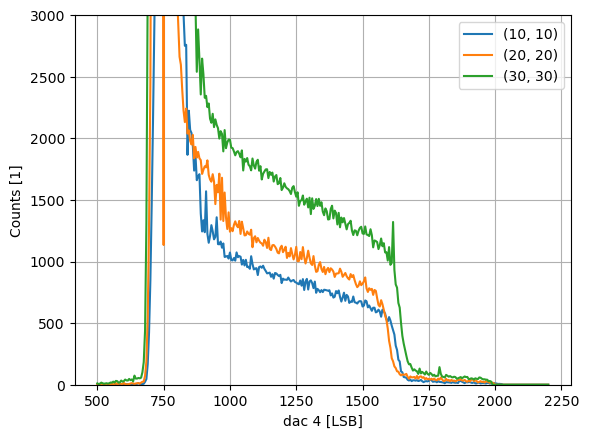

In [2]:
#single counter, scan enabled

with CtbRawFile(base / 'MH02/scan_12keV_vrf700_vrsh700_th0_master_0.json', transform = matterhorn02) as f:
    header, data = f.read() #Read all frames from the file.
    par = f.scan_parameters
    #Generate values from threshold from scan. 
    th = np.arange(*par)


#plot a few pixels
pixels = [(10,10),(20,20), (30,30)]

fig, ax = plt.subplots()
for p in pixels:
    ax.plot(th, data[:,*p], label = f'{p}')

ax.set_ylim(0,3e3)
ax.grid()
ax.set_xlabel(f'{par.dac} [LSB]')
ax.set_ylabel('Counts [1]')
ax.legend()

(340, 4, 48, 48)


Text(0.5, 1.0, 'Pixel (20, 20)')

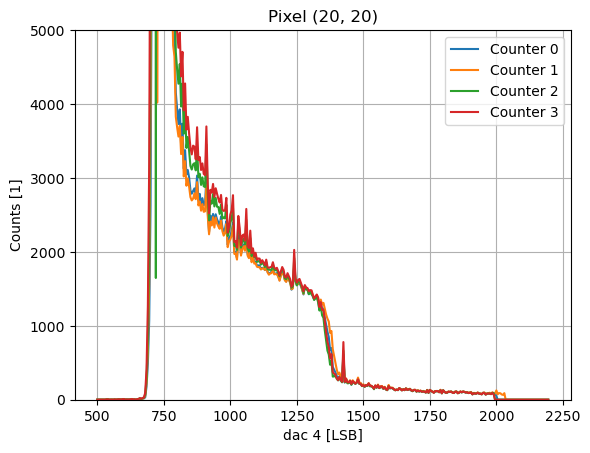

In [3]:
# four counters, "manual" scan. No info in raw file

with CtbRawFile(base / 'MH02/scan_all9keV_vrf700_vrsh700_th0_master_0.json', transform=matterhorn02) as f:
    header, data = f.read()
    
#Since there is no information in the raw file we have to know this from
#our beamtime logbook.
th = np.arange(500, 2200, 5)

#frame, counter, row, col
print(data.shape)

#plot the same pixel all counters
p = (20,20)
fig, ax = plt.subplots()
for i in range(4):
    ax.plot(th, data[:,i,*p], label = f'Counter {i}')

ax.set_ylim(0,5e3)
ax.grid()
ax.set_xlabel(f'{par.dac} [LSB]')
ax.set_ylabel('Counts [1]')
ax.legend()
ax.set_title(f'Pixel {p}')